In [386]:
from numpy.lib import median
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import os
import seaborn as sns

## Carga da Base

In [761]:
df_total = pd.DataFrame()
for i in os.listdir('normalizacao/'):
    df = pd.read_excel(f"normalizacao/{i}",header=None)
    df['Nome'] = i.split('-')[1].split('.')[0]
    df_total = pd.concat([df,df_total])
df_total = df_total.rename(columns={1:'Qtd Total Pontos',2:'Qtd Dados'})

In [514]:
df_total

,0,Qtd Total Pontos,Qtd Dados,3,4,5,6,7,8,9,...,6997,6998,6999,7000,7001,7002,7003,7004,7005,7006
0,Normal,209,209,567.446533,568.821289,566.604553,569.215271,567.596497,568.547424,566.788452,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Normal,300,300,879.816956,879.942139,879.928650,879.803467,879.663269,879.543823,879.566345,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Platô,2836,2833,572.095398,572.401611,571.013062,572.802307,570.430603,573.321533,570.844543,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Normal,232,232,870.932861,870.796021,870.880981,870.852600,870.916504,870.940430,871.018433,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Normal,243,243,565.241333,567.252869,565.120483,567.405396,565.388672,567.268066,565.052429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,Normal,195,195,582.270752,582.312927,582.332642,582.324463,582.339294,582.328979,582.372803,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233,Normal,204,204,823.033081,822.782959,822.402832,822.113342,821.986511,822.004822,821.789124,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
234,Normal,202,201,581.130737,581.057129,581.105042,581.154541,581.246277,581.339111,581.391541,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
235,Normal,226,224,821.867798,821.840637,821.707642,821.677490,821.820312,821.877625,821.798767,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ax = sns.countplot(y=df_total[0])
ax.bar_label(ax.containers[0])

In [ ]:
sns.countplot(y=df_total['Nome'])

## Quantidade de dados de cada Subida/Descida

In [527]:
df_total['%De N Vazios'] = df_total['Qtd Dados'] / df_total['Qtd Total Pontos']

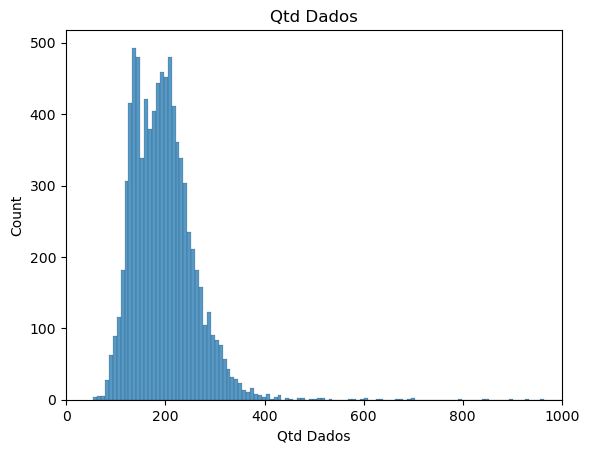

In [531]:
fig, ax = plt.subplots()
sns.histplot(x='Qtd Dados',data=df_total)
ax.set_xlim(-1, 1000)
plt.title('Qtd Dados')
plt.show()

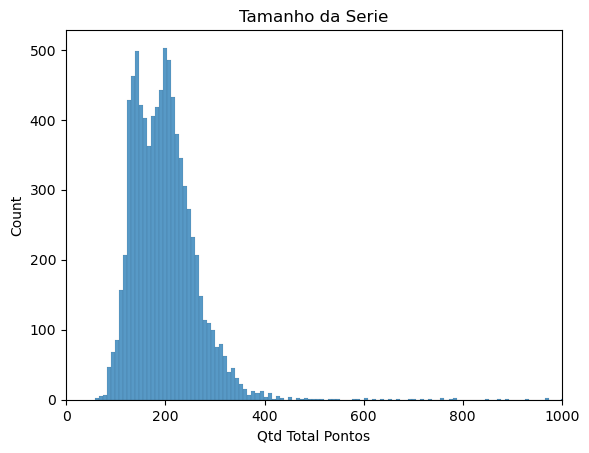

In [533]:
fig, ax = plt.subplots()
sns.histplot(x='Qtd Total Pontos',data=df_total)
ax.set_xlim(-1, 1000)
plt.title('Tamanho da Serie')
plt.show()

In [499]:
df_total['%De Vazios'] = df_total['QTD Dados']/ df_total['QTD Total Pontos']

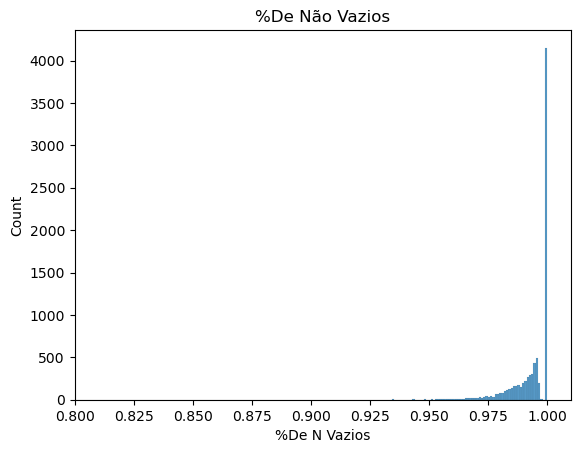

In [541]:
fig, ax = plt.subplots()
sns.histplot(x='%De N Vazios',data=df_total)
ax.set_xlim(0.8,1.01)
plt.title('%De Não Vazios')
plt.show()

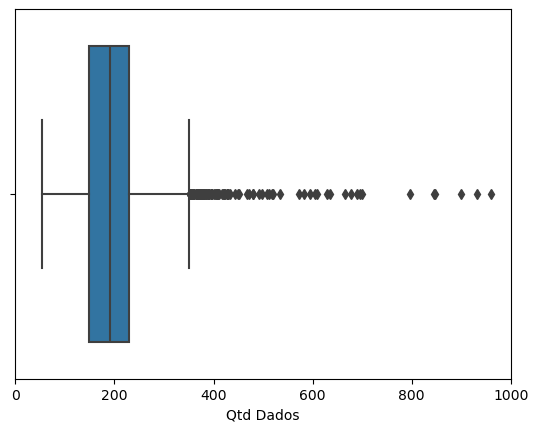

In [543]:
fig, ax = plt.subplots()
sns.boxplot(x='Qtd Dados',data=df_total, ax=ax)
ax.set_xlim(-1, 1000)
plt.show()

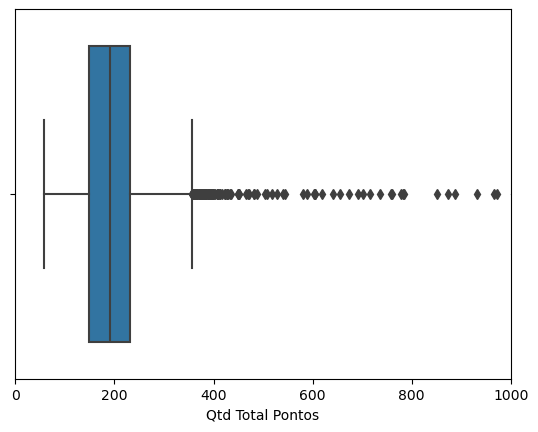

In [547]:
fig, ax = plt.subplots()
sns.boxplot(x='Qtd Total Pontos',data=df_total, ax=ax)
ax.set_xlim(-1, 1000)
plt.show()

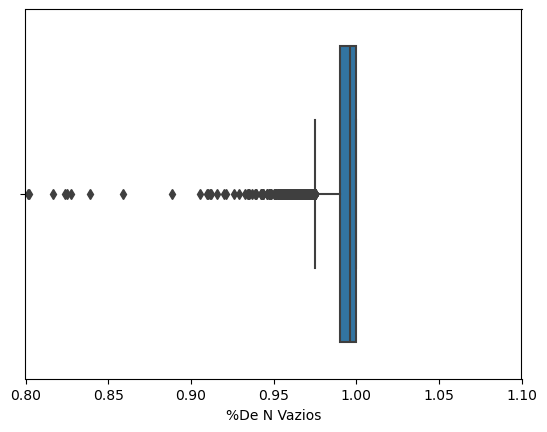

In [557]:
fig, ax = plt.subplots()
sns.boxplot(x='%De N Vazios',data=df_total, ax=ax)
ax.set_xlim(0.8,1.1)
plt.show()

In [589]:
df_total['%De N Vazios'][df_total['%De N Vazios'] < 0.85].count()

47

In [591]:
df_total['%De N Vazios'][(df_total['%De N Vazios'] < 0.85) & (df_total[0] != 'Erro na Coleta')].count()

23

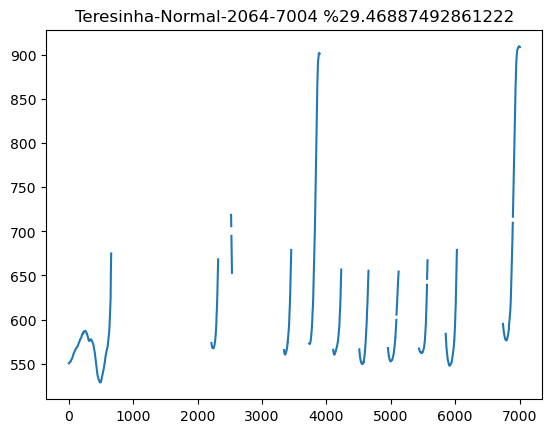

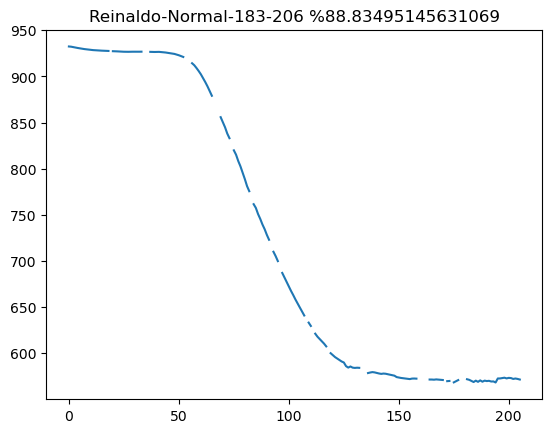

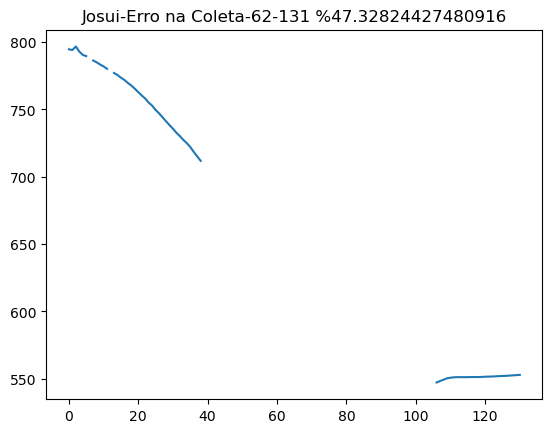

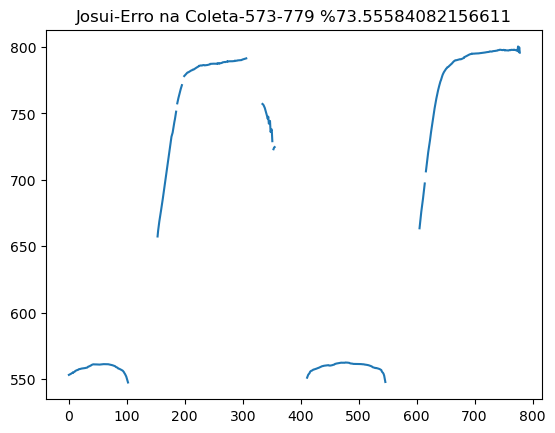

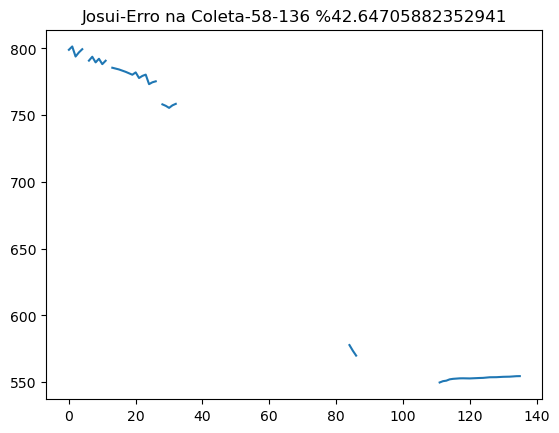

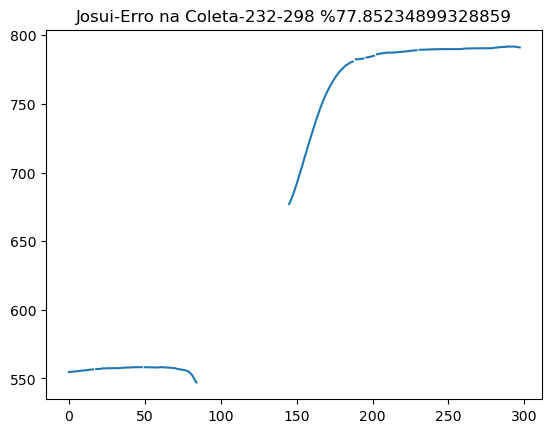

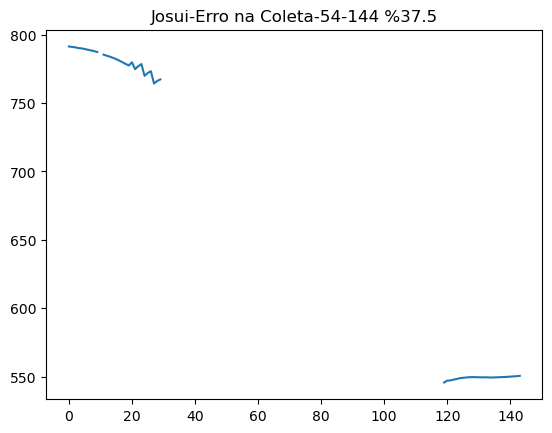

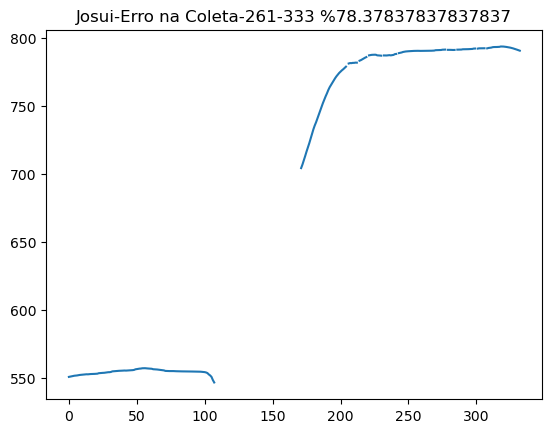

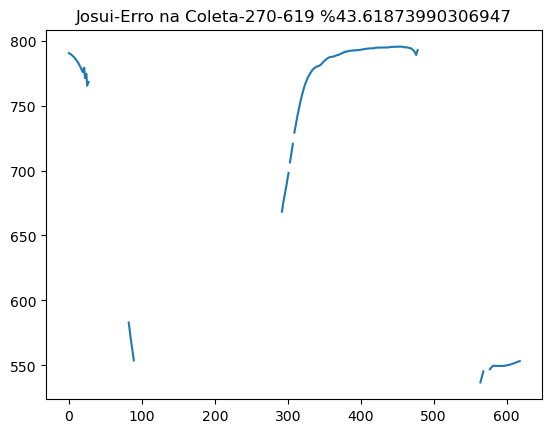

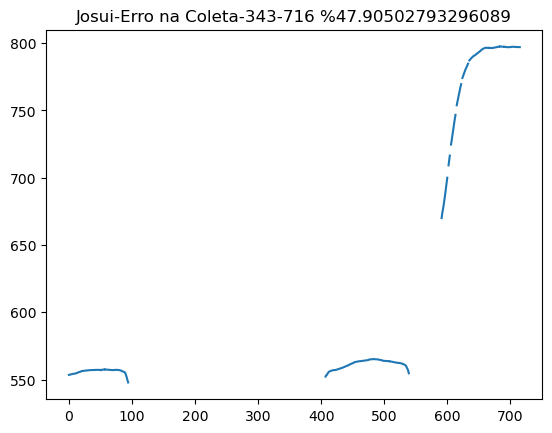

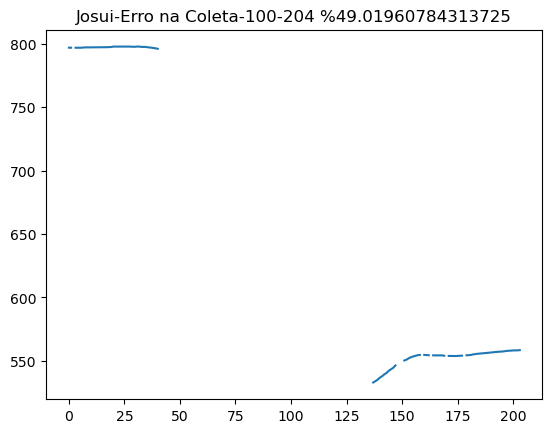

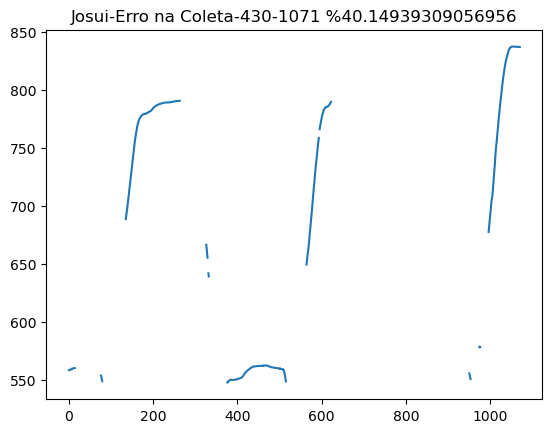

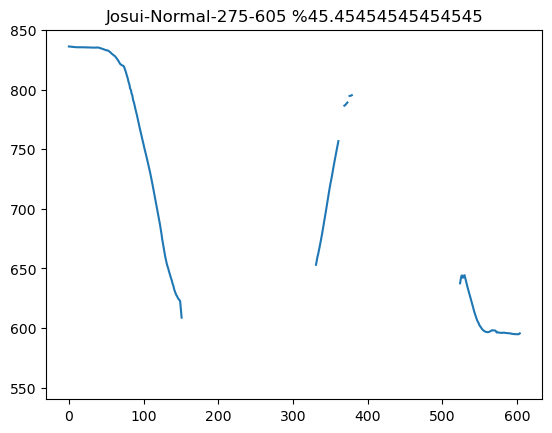

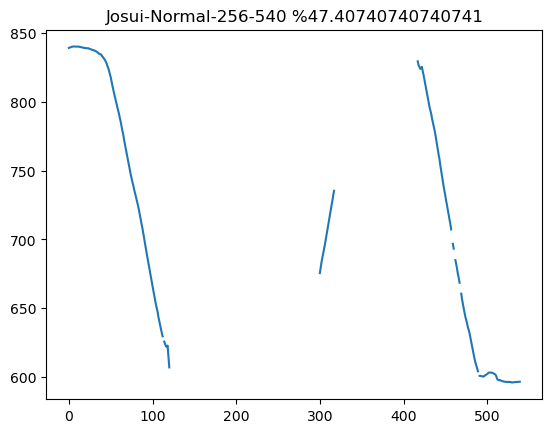

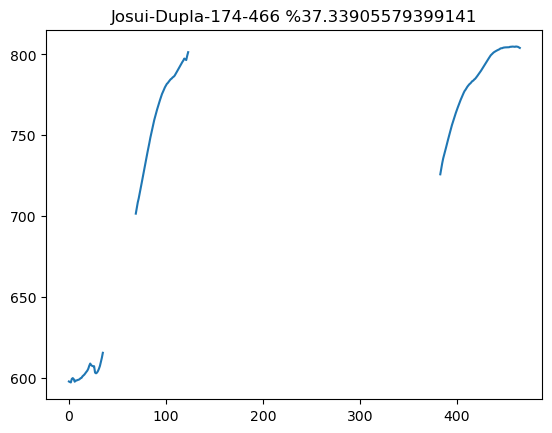

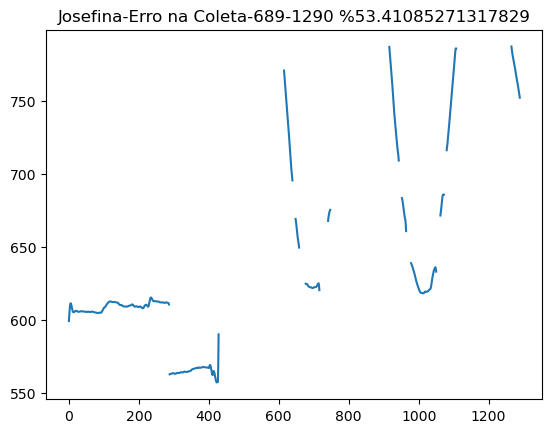

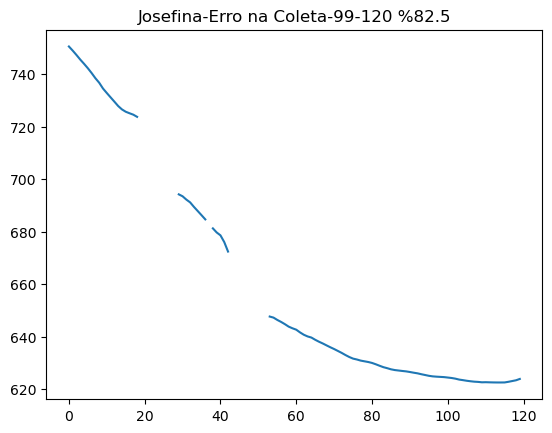

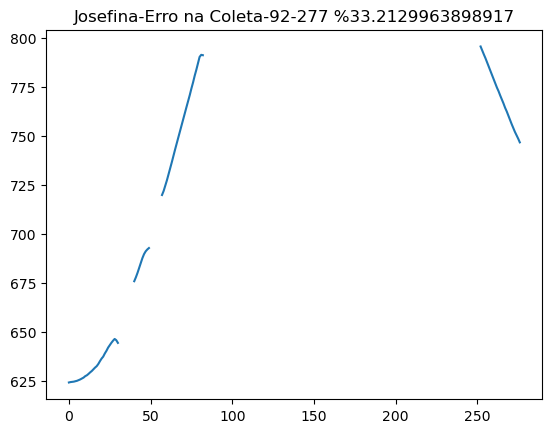

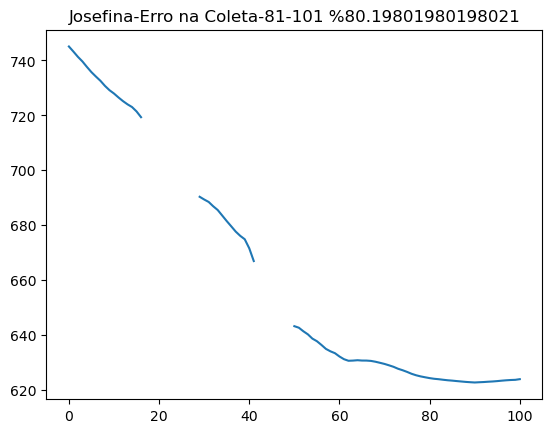

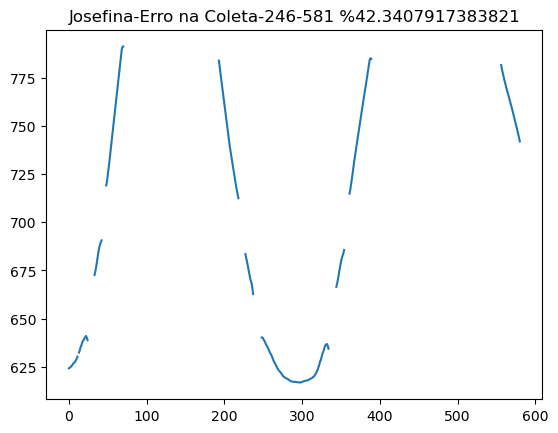

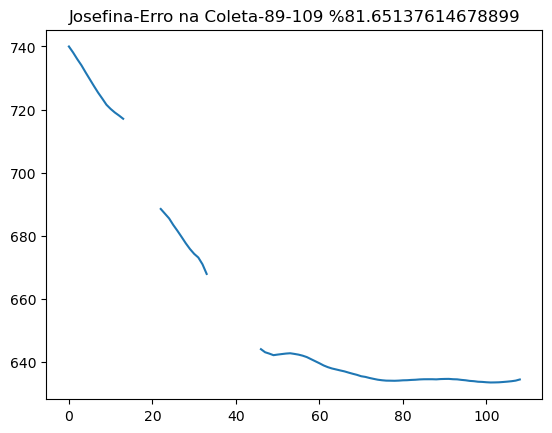

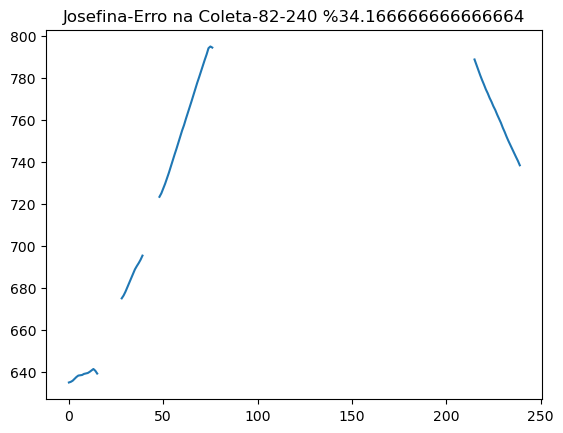

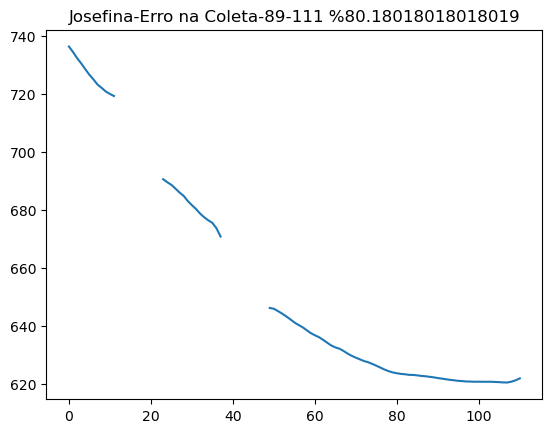

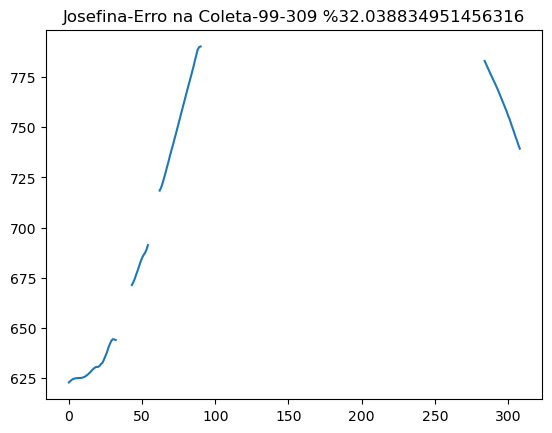

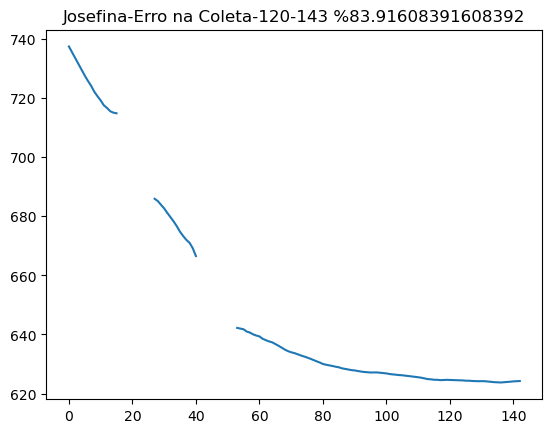

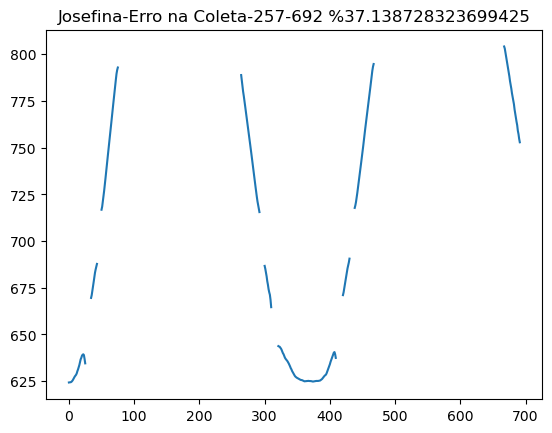

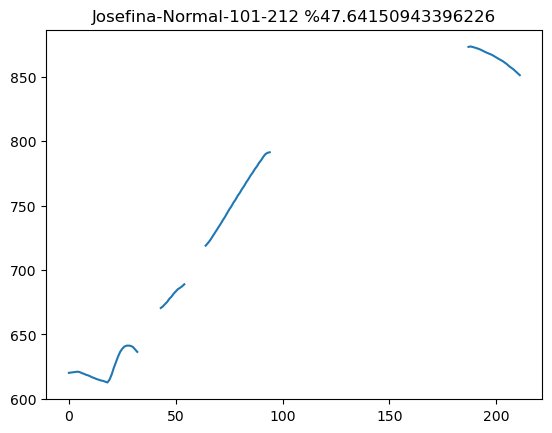

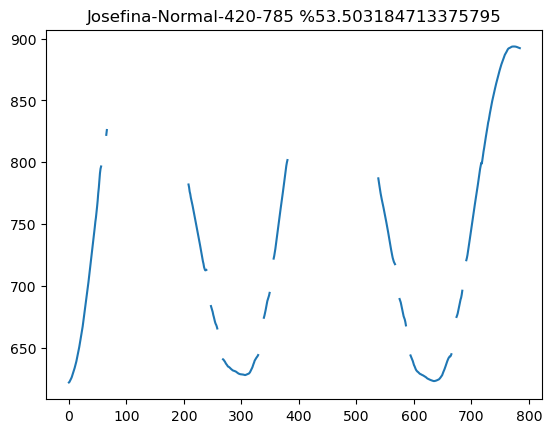

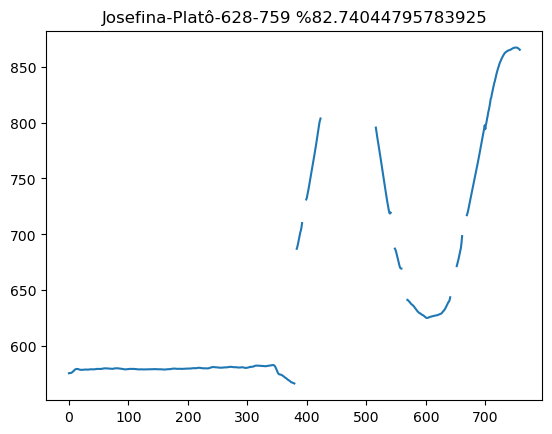

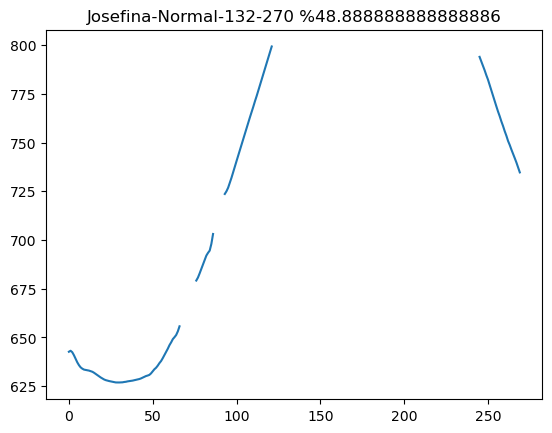

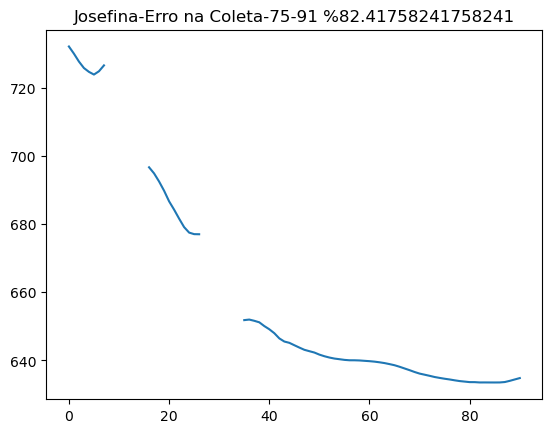

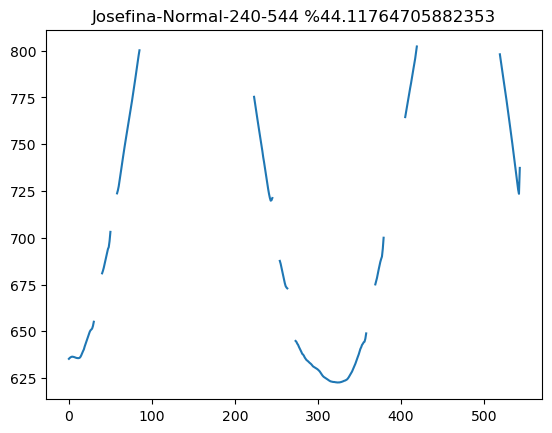

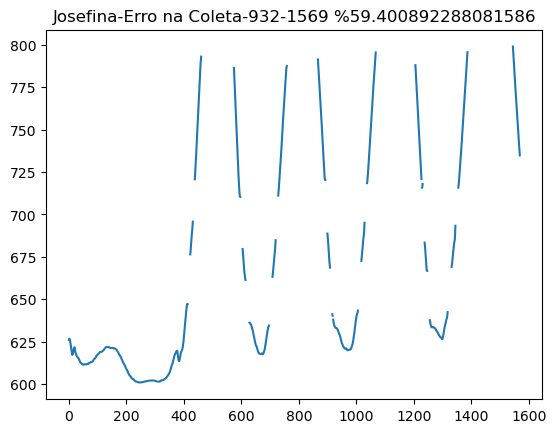

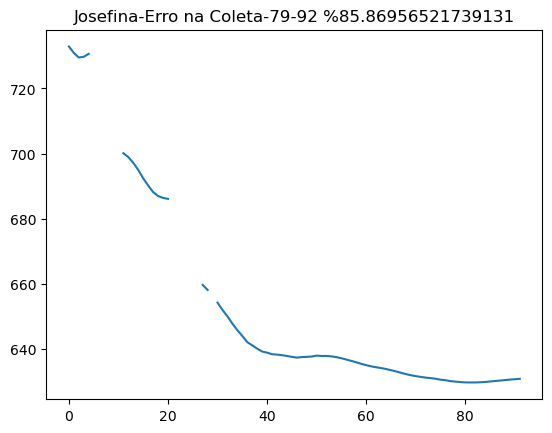

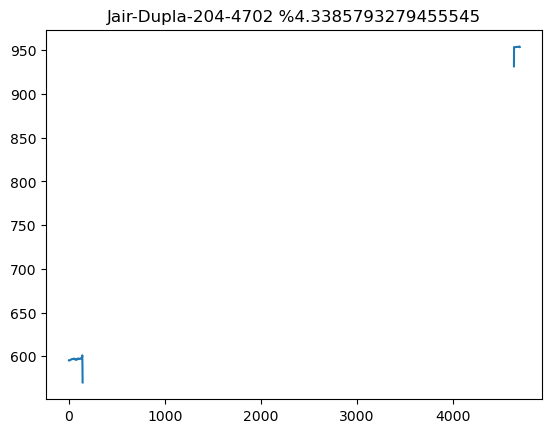

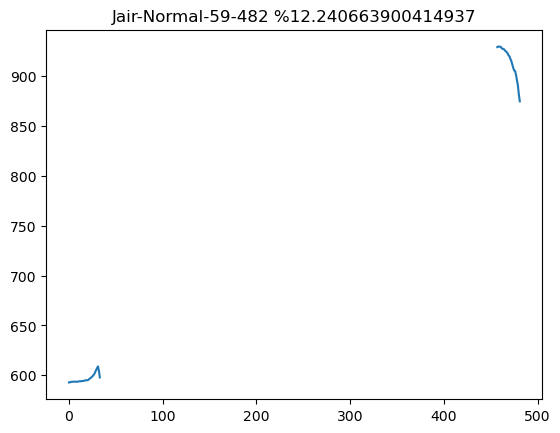

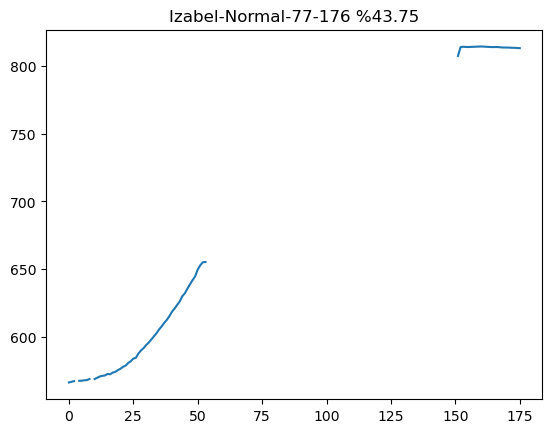

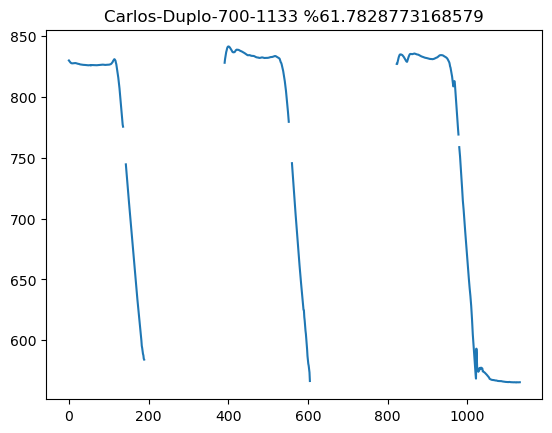

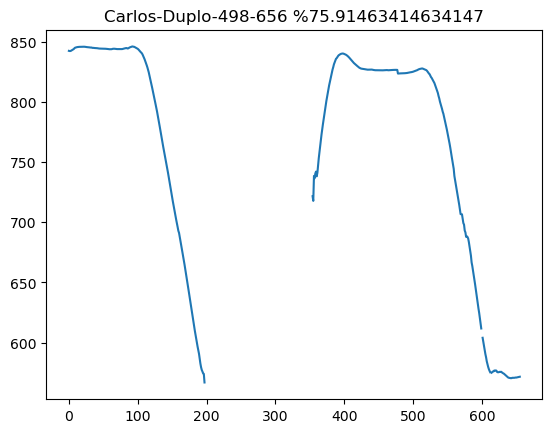

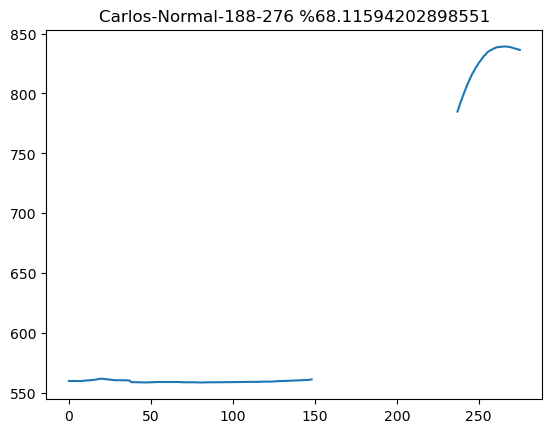

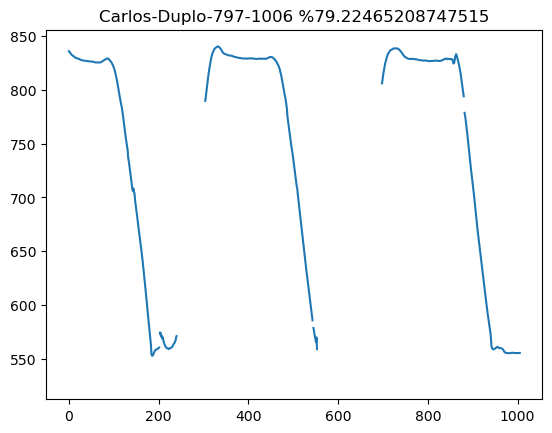

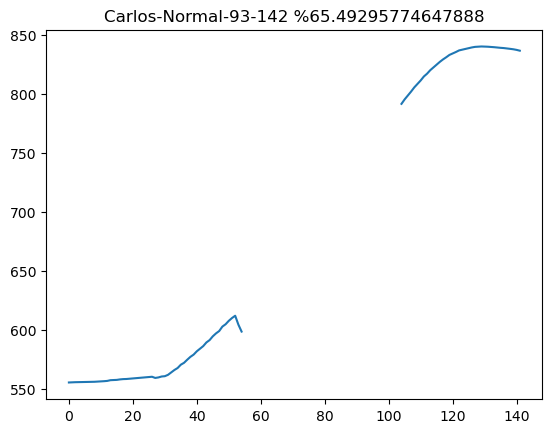

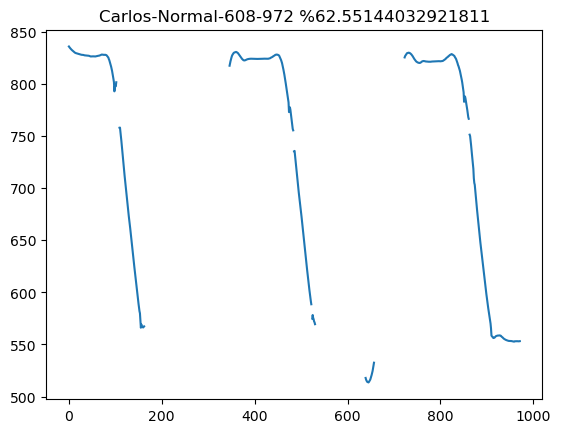

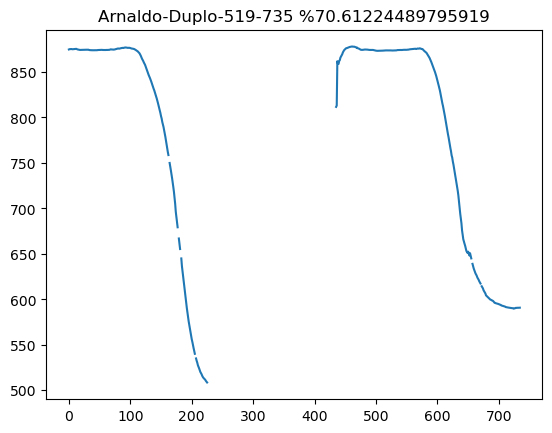

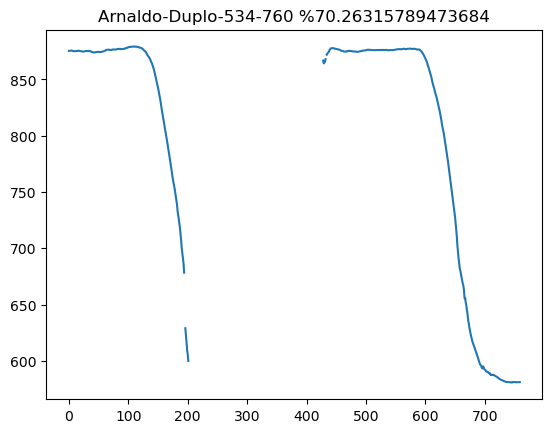

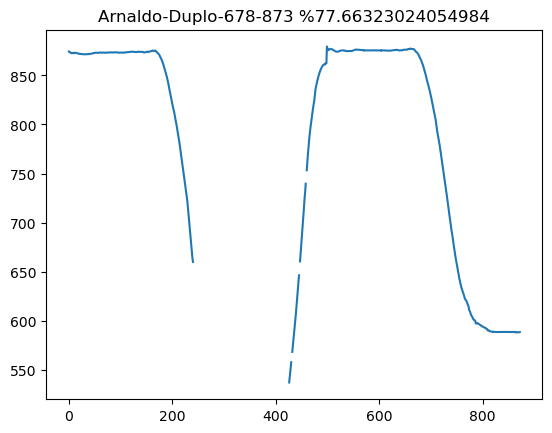

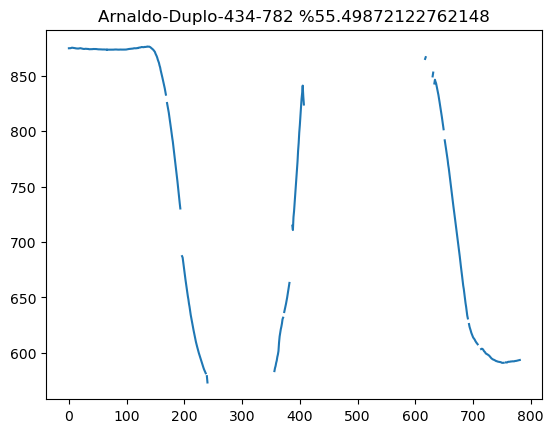

In [599]:
porcentagem = 0.85
nome = df_total[df_total['%De N Vazios'] < porcentagem]['Nome'].to_numpy()
anot = df_total[df_total['%De N Vazios'] < porcentagem][0].to_numpy()
dados = df_total[df_total['%De N Vazios'] < porcentagem]['Qtd Dados'].to_numpy()
pontos = df_total[df_total['%De N Vazios'] < porcentagem]['Qtd Total Pontos'].to_numpy()
count = 0
for x in df_total[df_total['%De N Vazios'] < porcentagem].drop([0,'Nome','Qtd Dados','Qtd Total Pontos','%De N Vazios'],axis = 1).to_numpy():
    plt.plot(x)
    plt.title(nome[count]+ '-'+ anot[count]+'-'+str(dados[count])+'-'+str(pontos[count])+' %'+str(dados[count]/pontos[count]*100))
    count += 1
    plt.show()

## Primeira Filtragem

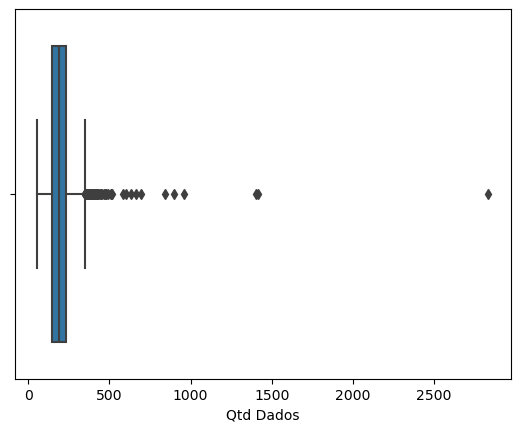

In [683]:
df_filtrado = df_total[(df_total['%De N Vazios'] > 0.85) & (df_total[0] != 'Erro na Coleta')]# & (df_total['Qtd Total Pontos'] < 500)]

fig, ax = plt.subplots()
sns.boxplot(x='Qtd Dados',data=df_filtrado, ax=ax)
#ax.set_xlim(-1, 2000)
plt.show()

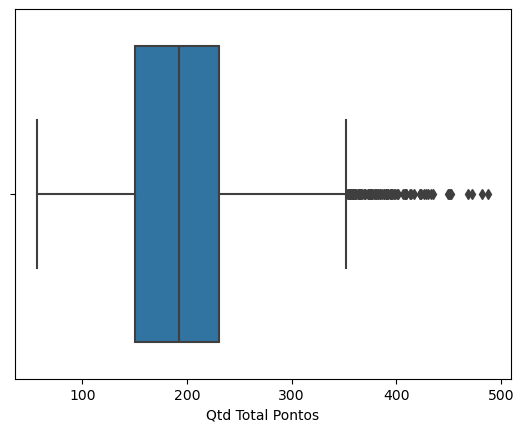

In [679]:
fig, ax = plt.subplots()
sns.boxplot(x='Qtd Total Pontos',data=df_filtrado, ax=ax)
#ax.set_xlim(-1, 1000)
plt.show()

In [685]:
df_filtrado['Qtd Total Pontos'][df_filtrado['Qtd Total Pontos'] > 500].count()

15

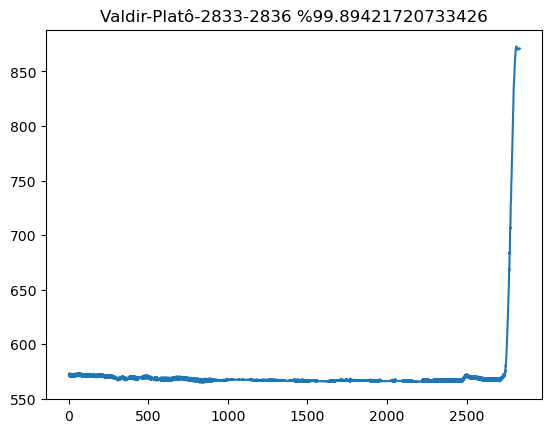

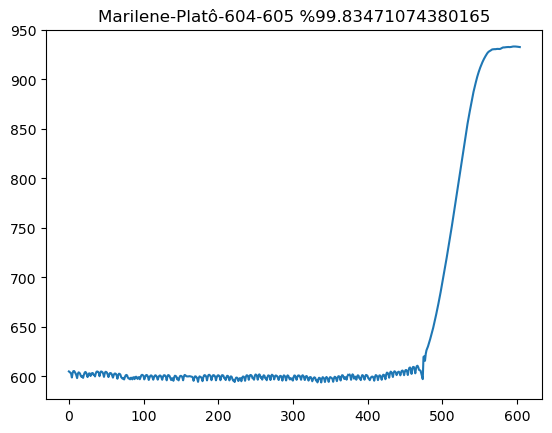

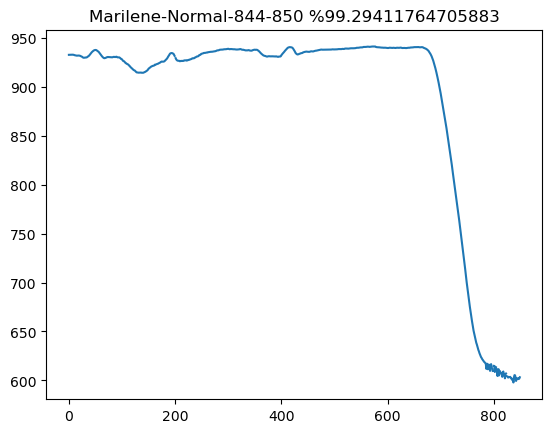

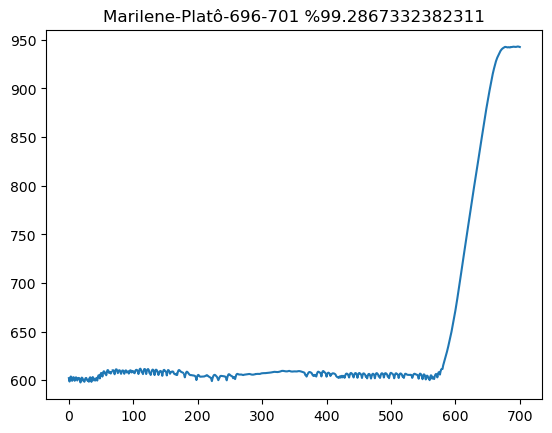

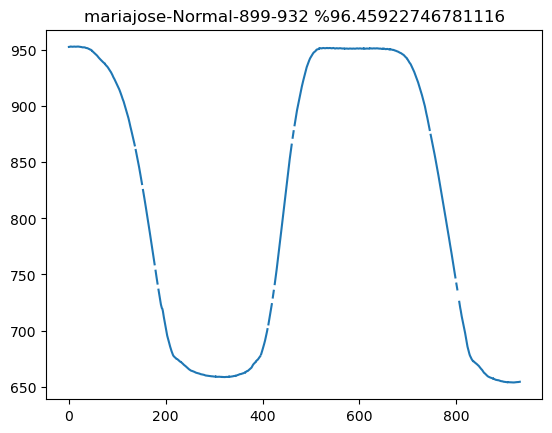

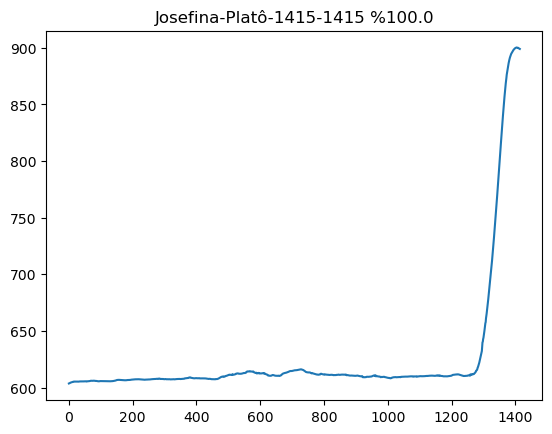

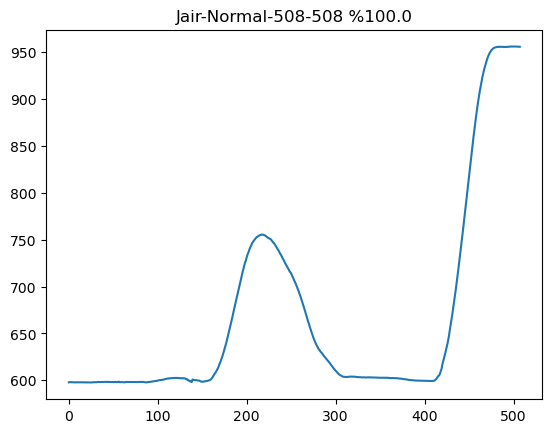

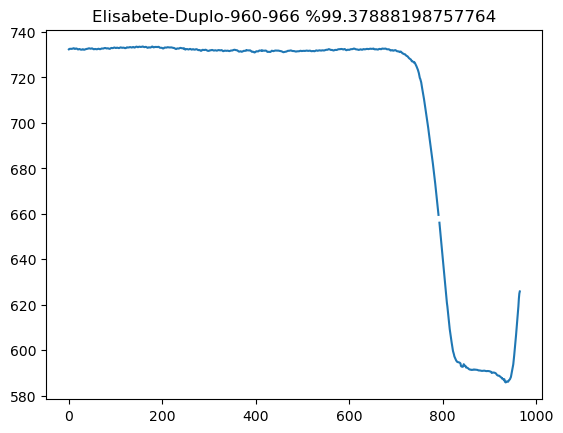

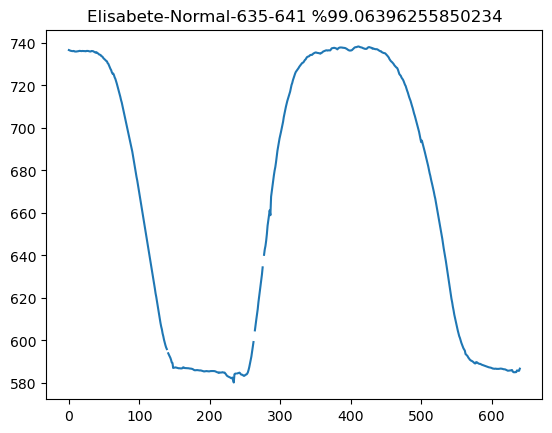

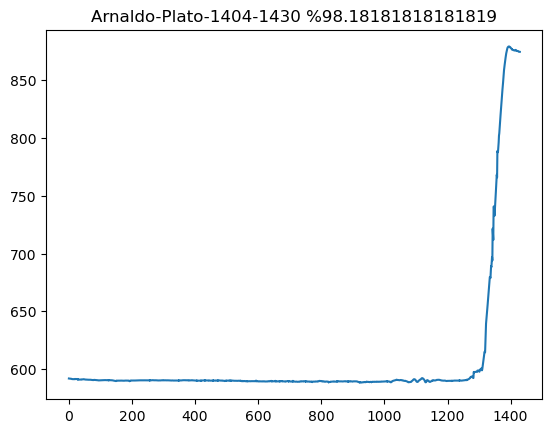

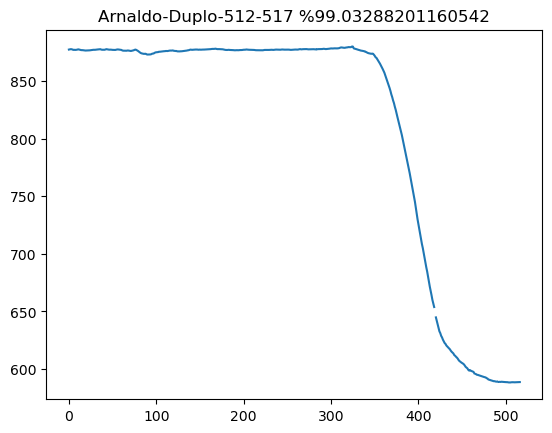

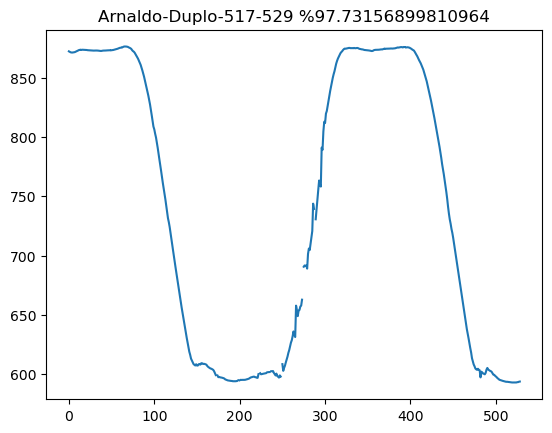

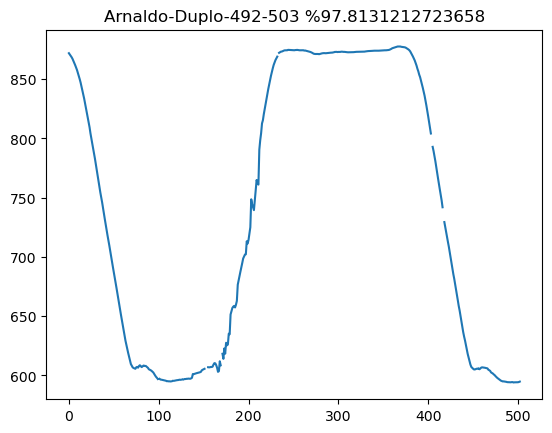

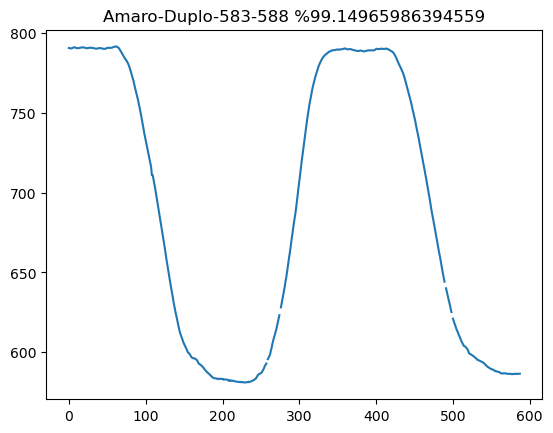

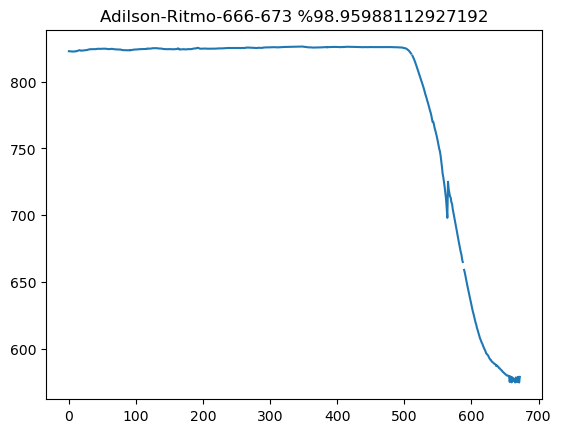

In [671]:
tamanho = 500
nome = df_filtrado[df_filtrado['Qtd Total Pontos'] > tamanho]['Nome'].to_numpy()
anot = df_filtrado[df_filtrado['Qtd Total Pontos'] > tamanho][0].to_numpy()
dados = df_filtrado[df_filtrado['Qtd Total Pontos'] > tamanho]['Qtd Dados'].to_numpy()
pontos = df_filtrado[df_filtrado['Qtd Total Pontos'] > tamanho]['Qtd Total Pontos'].to_numpy()
count = 0
for x in df_filtrado[df_filtrado['Qtd Total Pontos'] > tamanho].drop([0,'Nome','Qtd Dados','Qtd Total Pontos','%De N Vazios'],axis = 1).to_numpy():
    plt.plot(x)
    plt.title(nome[count]+ '-'+ anot[count]+'-'+str(dados[count])+'-'+str(pontos[count])+' %'+str(dados[count]/pontos[count]*100))
    count += 1
    plt.show()

## Segunda Filtragem

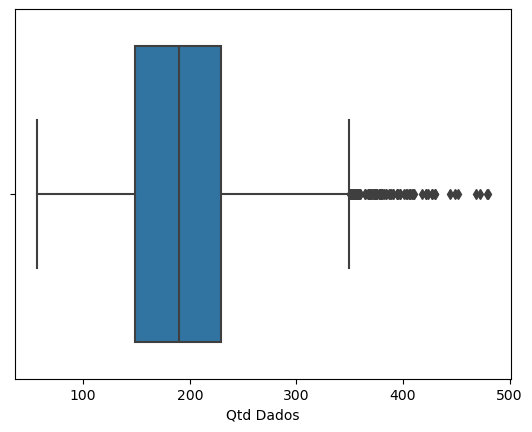

In [695]:
df_filtrado2 = df_total[(df_total['%De N Vazios'] > 0.85) & (df_total[0] != 'Erro na Coleta') & (df_total['Qtd Total Pontos'] < 500)]

fig, ax = plt.subplots()
sns.boxplot(x='Qtd Dados',data=df_filtrado2, ax=ax)
#ax.set_xlim(-1, 2000)
plt.show()

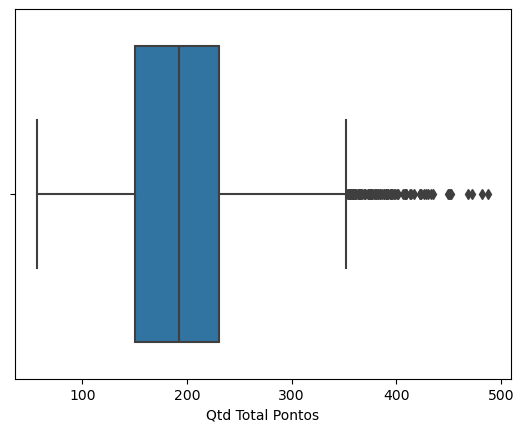

In [697]:
fig, ax = plt.subplots()
sns.boxplot(x='Qtd Total Pontos',data=df_filtrado2, ax=ax)
#ax.set_xlim(-1, 2000)
plt.show()

In [751]:
df_filtrado2['Qtd Total Pontos'][df_filtrado2['Qtd Total Pontos'] <80].count()

9

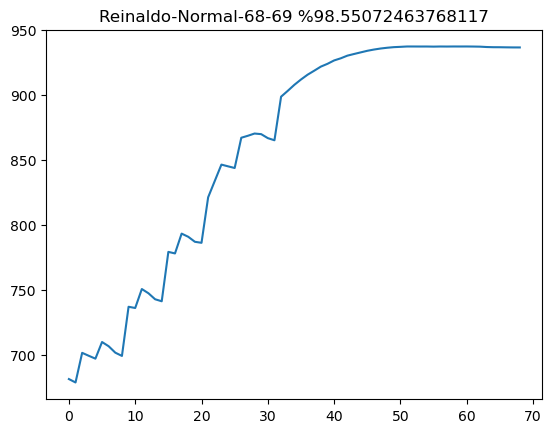

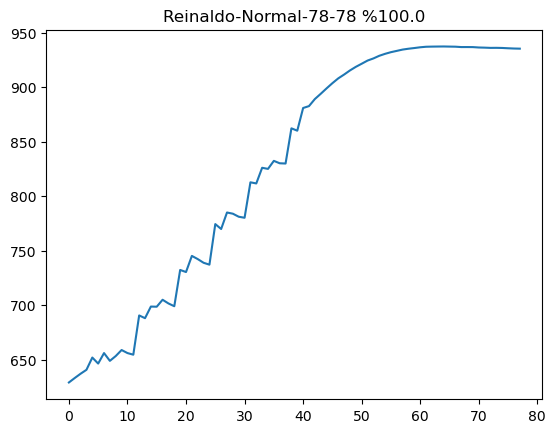

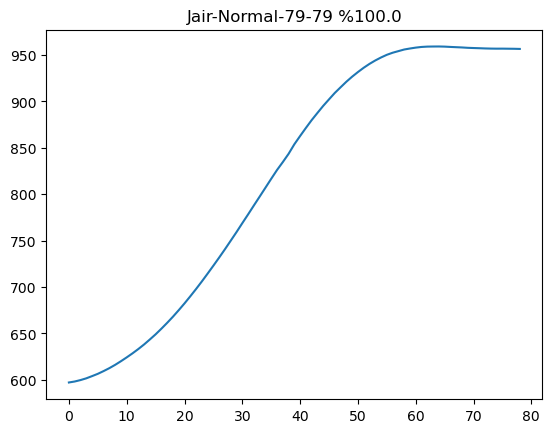

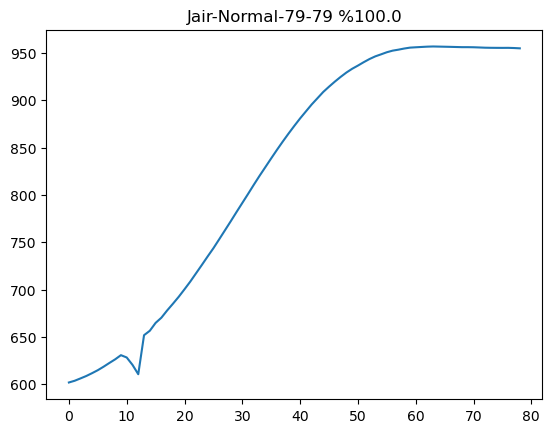

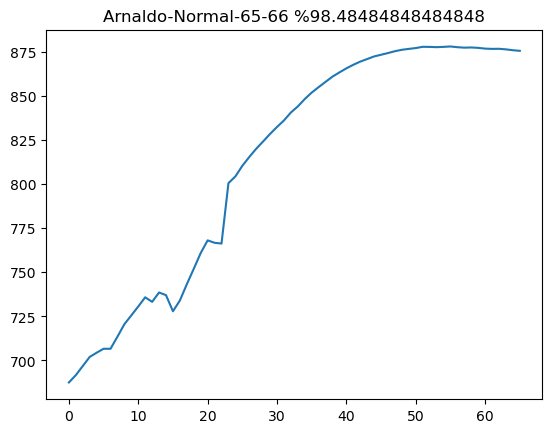

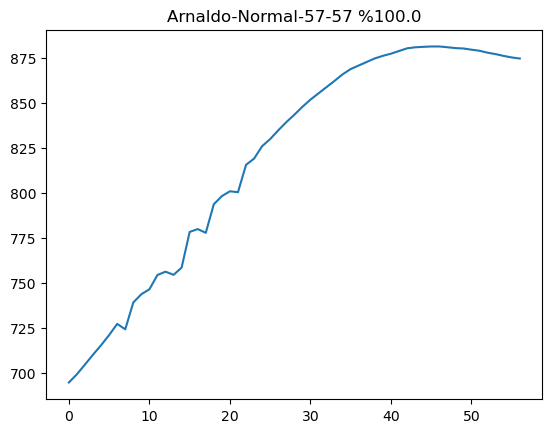

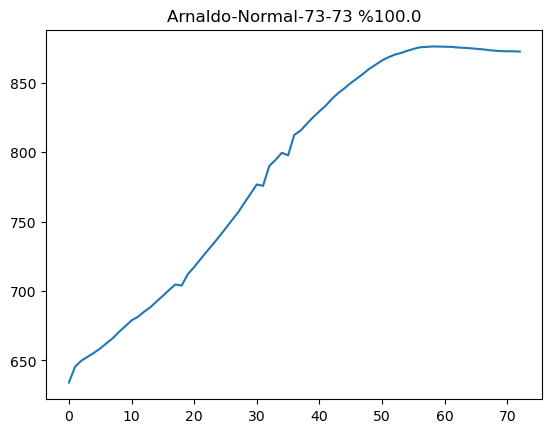

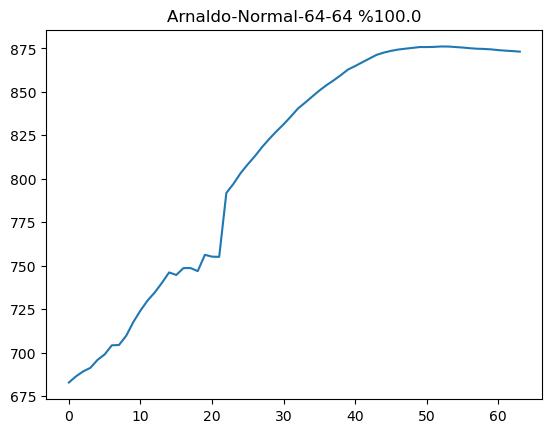

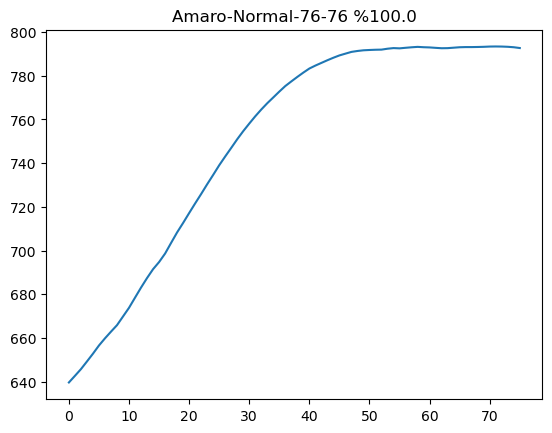

In [755]:
tamanho = 80
nome = df_filtrado2[df_filtrado2['Qtd Total Pontos'] < tamanho]['Nome'].to_numpy()
anot = df_filtrado2[df_filtrado2['Qtd Total Pontos'] < tamanho][0].to_numpy()
dados = df_filtrado2[df_filtrado2['Qtd Total Pontos'] < tamanho]['Qtd Dados'].to_numpy()
pontos = df_filtrado2[df_filtrado2['Qtd Total Pontos'] < tamanho]['Qtd Total Pontos'].to_numpy()
count = 0
for x in df_filtrado2[df_filtrado2['Qtd Total Pontos'] < tamanho].drop([0,'Nome','Qtd Dados','Qtd Total Pontos','%De N Vazios'],axis = 1).to_numpy():
    x = pd.Series(x[:pontos[count]]).interpolate().to_numpy()
    plt.plot(x)
    plt.title(nome[count]+ '-'+ anot[count]+'-'+str(dados[count])+'-'+str(pontos[count])+' %'+str(dados[count]/pontos[count]*100))
    count += 1
    plt.show()

## Visualizando Series com suas classes

In [773]:
np_x = df_total.drop([0,'Nome','Qtd Dados','Qtd Total Pontos'],axis = 1).to_numpy()
pessoas = df_total['Nome'].to_numpy()
classes = df_total[0].to_numpy()

plot_x = []
nome = ''
count = -1
for line in range(len(np_x)):
    if nome != pessoas[line]:
        count += 1
        plot_x.append([[],[],[]])
        plot_x[count][0] = pessoas[line]
        plot_x[count][1] = [[],[]]
        plot_x[count][2] = [[],[]]
        nome = pessoas[line]
        y = 0
    for x in np_x[line]:
        if classes[line] == 'Normal':
            plot_x[count][1][0].append(x)
            plot_x[count][1][1].append(y)
        else:
            plot_x[count][2][0].append(x)
            plot_x[count][2][1].append(y)
        y += 1
        


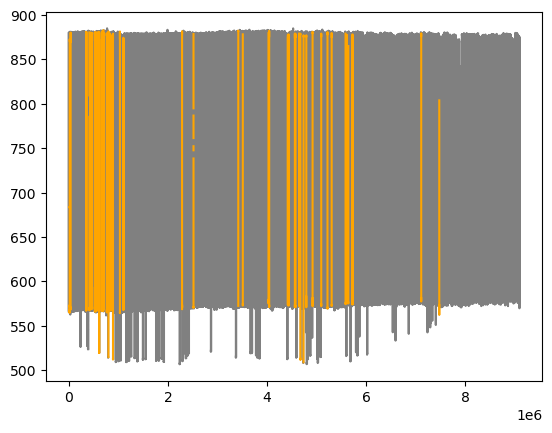

In [811]:
plt.plot(plot_x[0][1][1], plot_x[0][1][0],color ='gray')
plt.plot(plot_x[0][2][1], plot_x[0][2][0],color ='orange')
plt.show()

In [ ]:
from dash import Dash, html, dcc, callback, Output, Input
import plotly.express as px
import pandas as pd
app = Dash()
app.layout = [
    html.H1(children='Title of Dash App', style={'textAlign':'center'}),
    dcc.Graph(id='graph-content')
]

